In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data
https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

In [295]:
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [296]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [297]:
#Valores nulos
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Hagamos dos boxplot para poder visualizar mejor

# Veamos algunas estadísticas

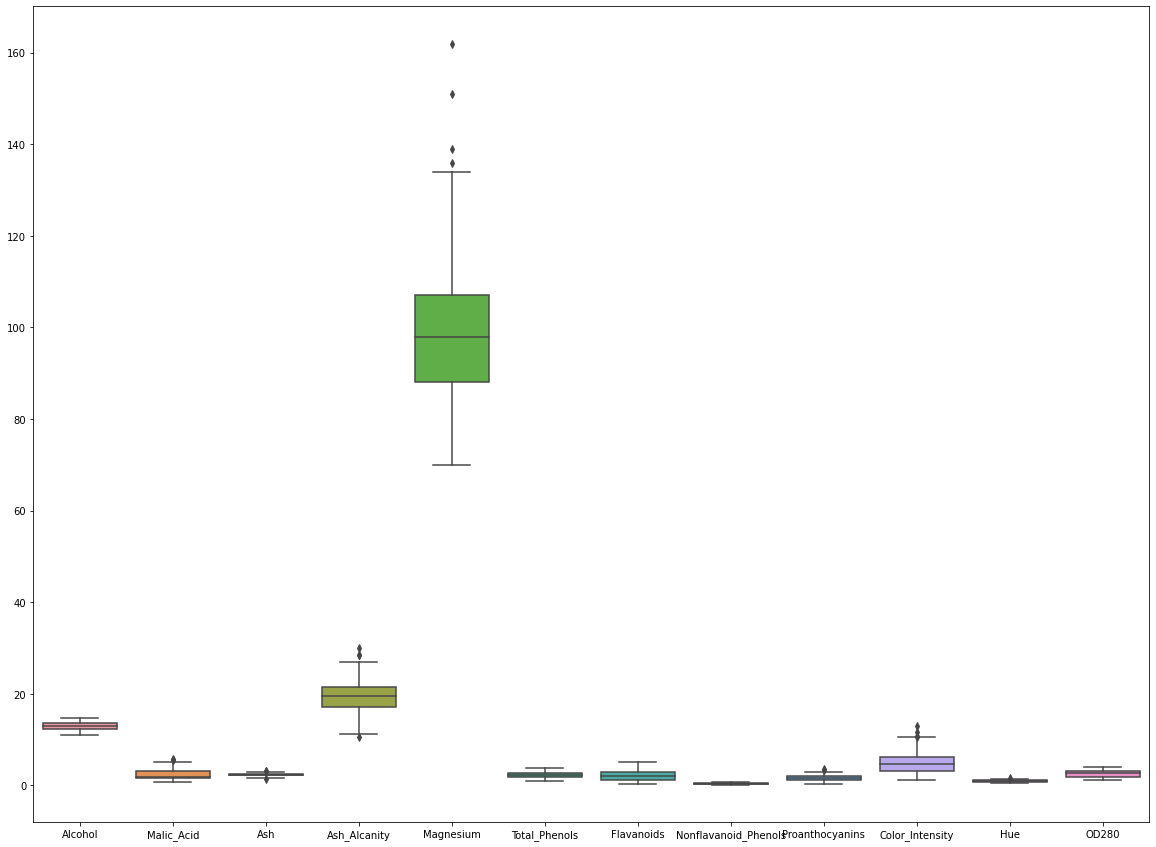

In [298]:
plt.figure(figsize = (20,15))
sns.boxplot(data = data.iloc[:,0:-1]);

# Podemos ver que tenemos algunos outliers

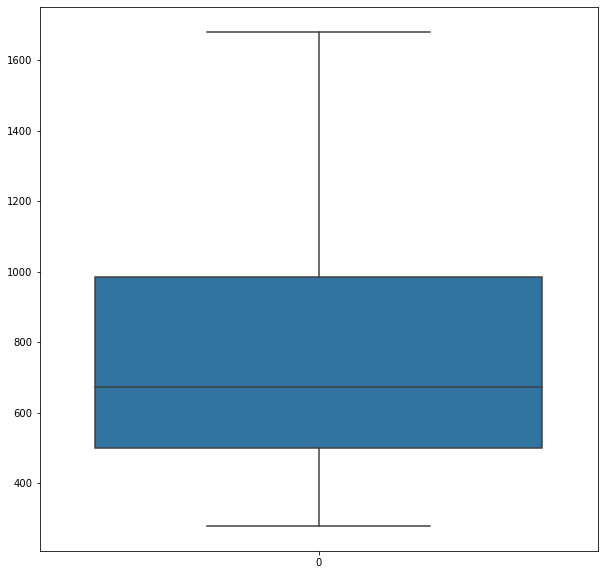

In [299]:
plt.figure(figsize = (10,10))
sns.boxplot(data = data.iloc[:,-1]);

# también podemos ver que las variables se encuentran en distintos ordenes de magnitud, por lo tanto debemos estandarizar o normalizar más adelante.

# Vizualicemos la distribución de las observaciones de la data

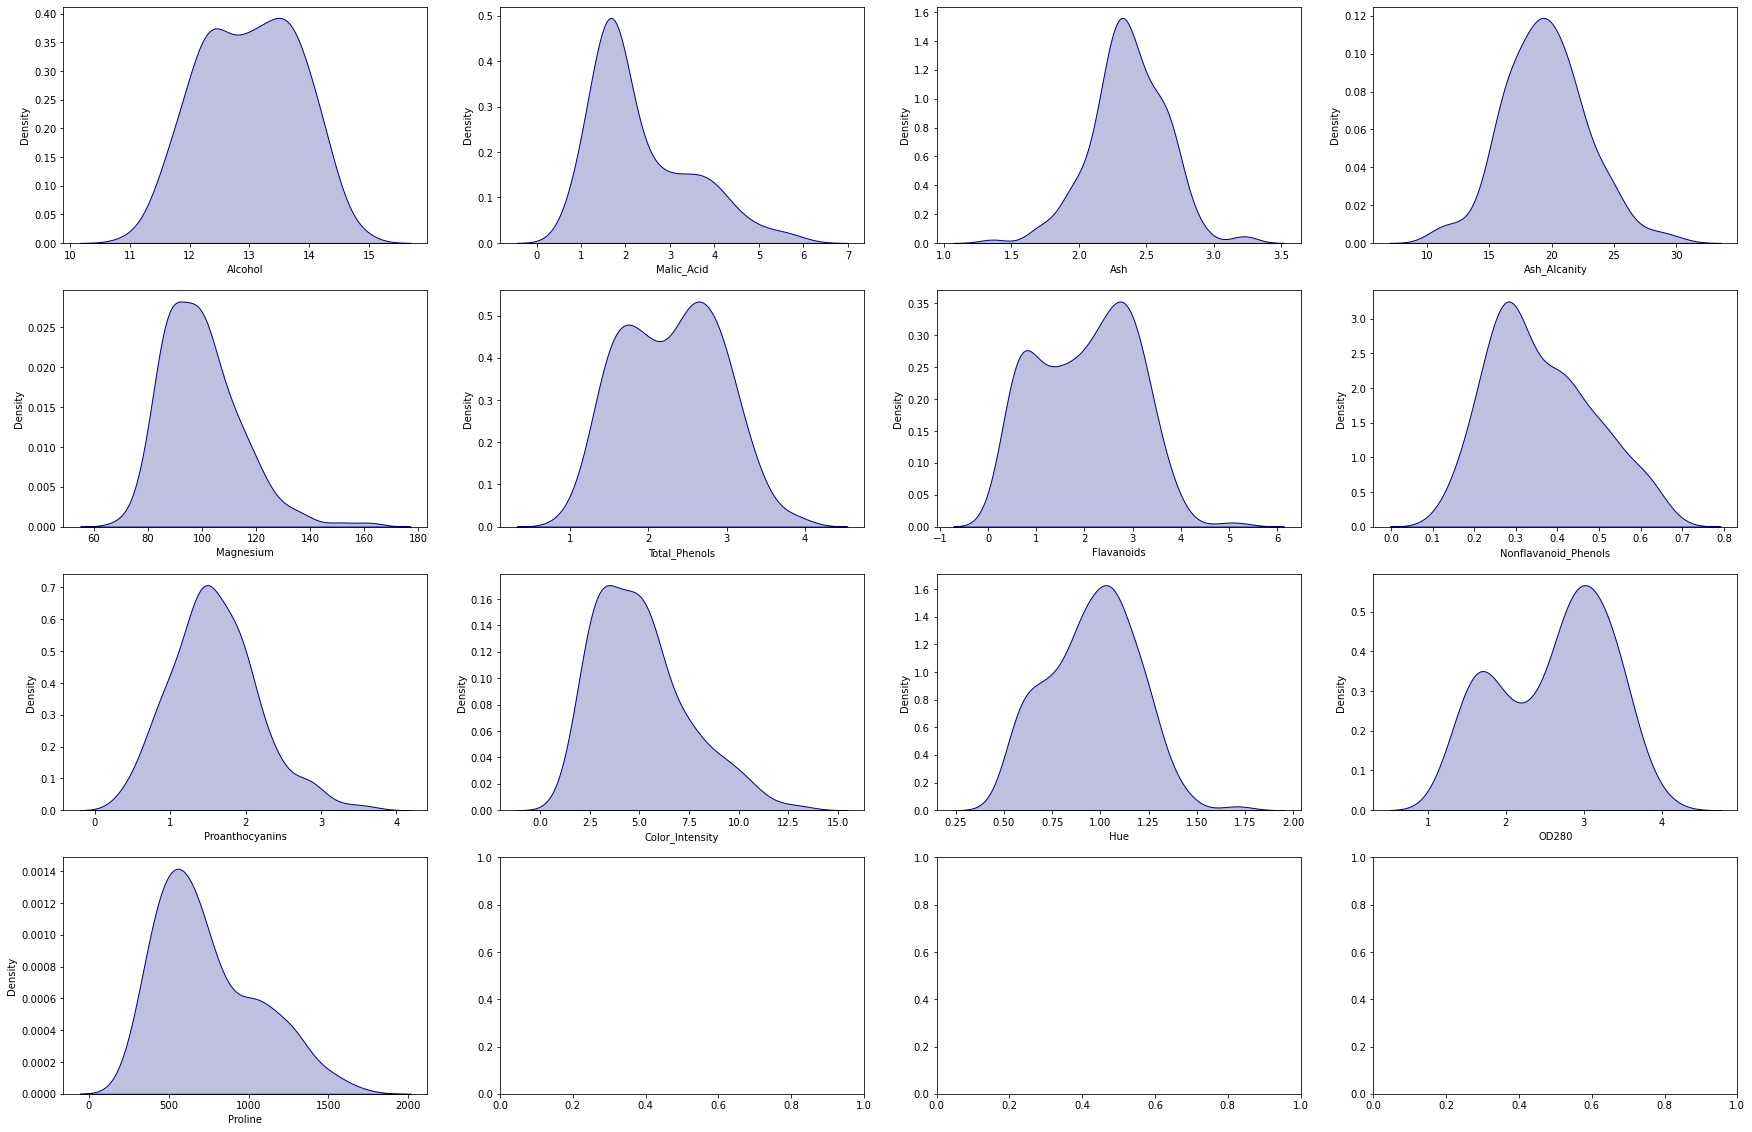

In [300]:


columns = data.columns.values
#print(columns)
fig, axes = plt.subplots(4, 4, sharex=False, figsize=(30,20))
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[2,0],axes[2,1],axes[2,2],axes[2,3],axes[3,0]]
j=0
for column in columns:
      sns.kdeplot(data = data,ax=axeslist[j], x = column,fill=True,color="navy")
      j += 1

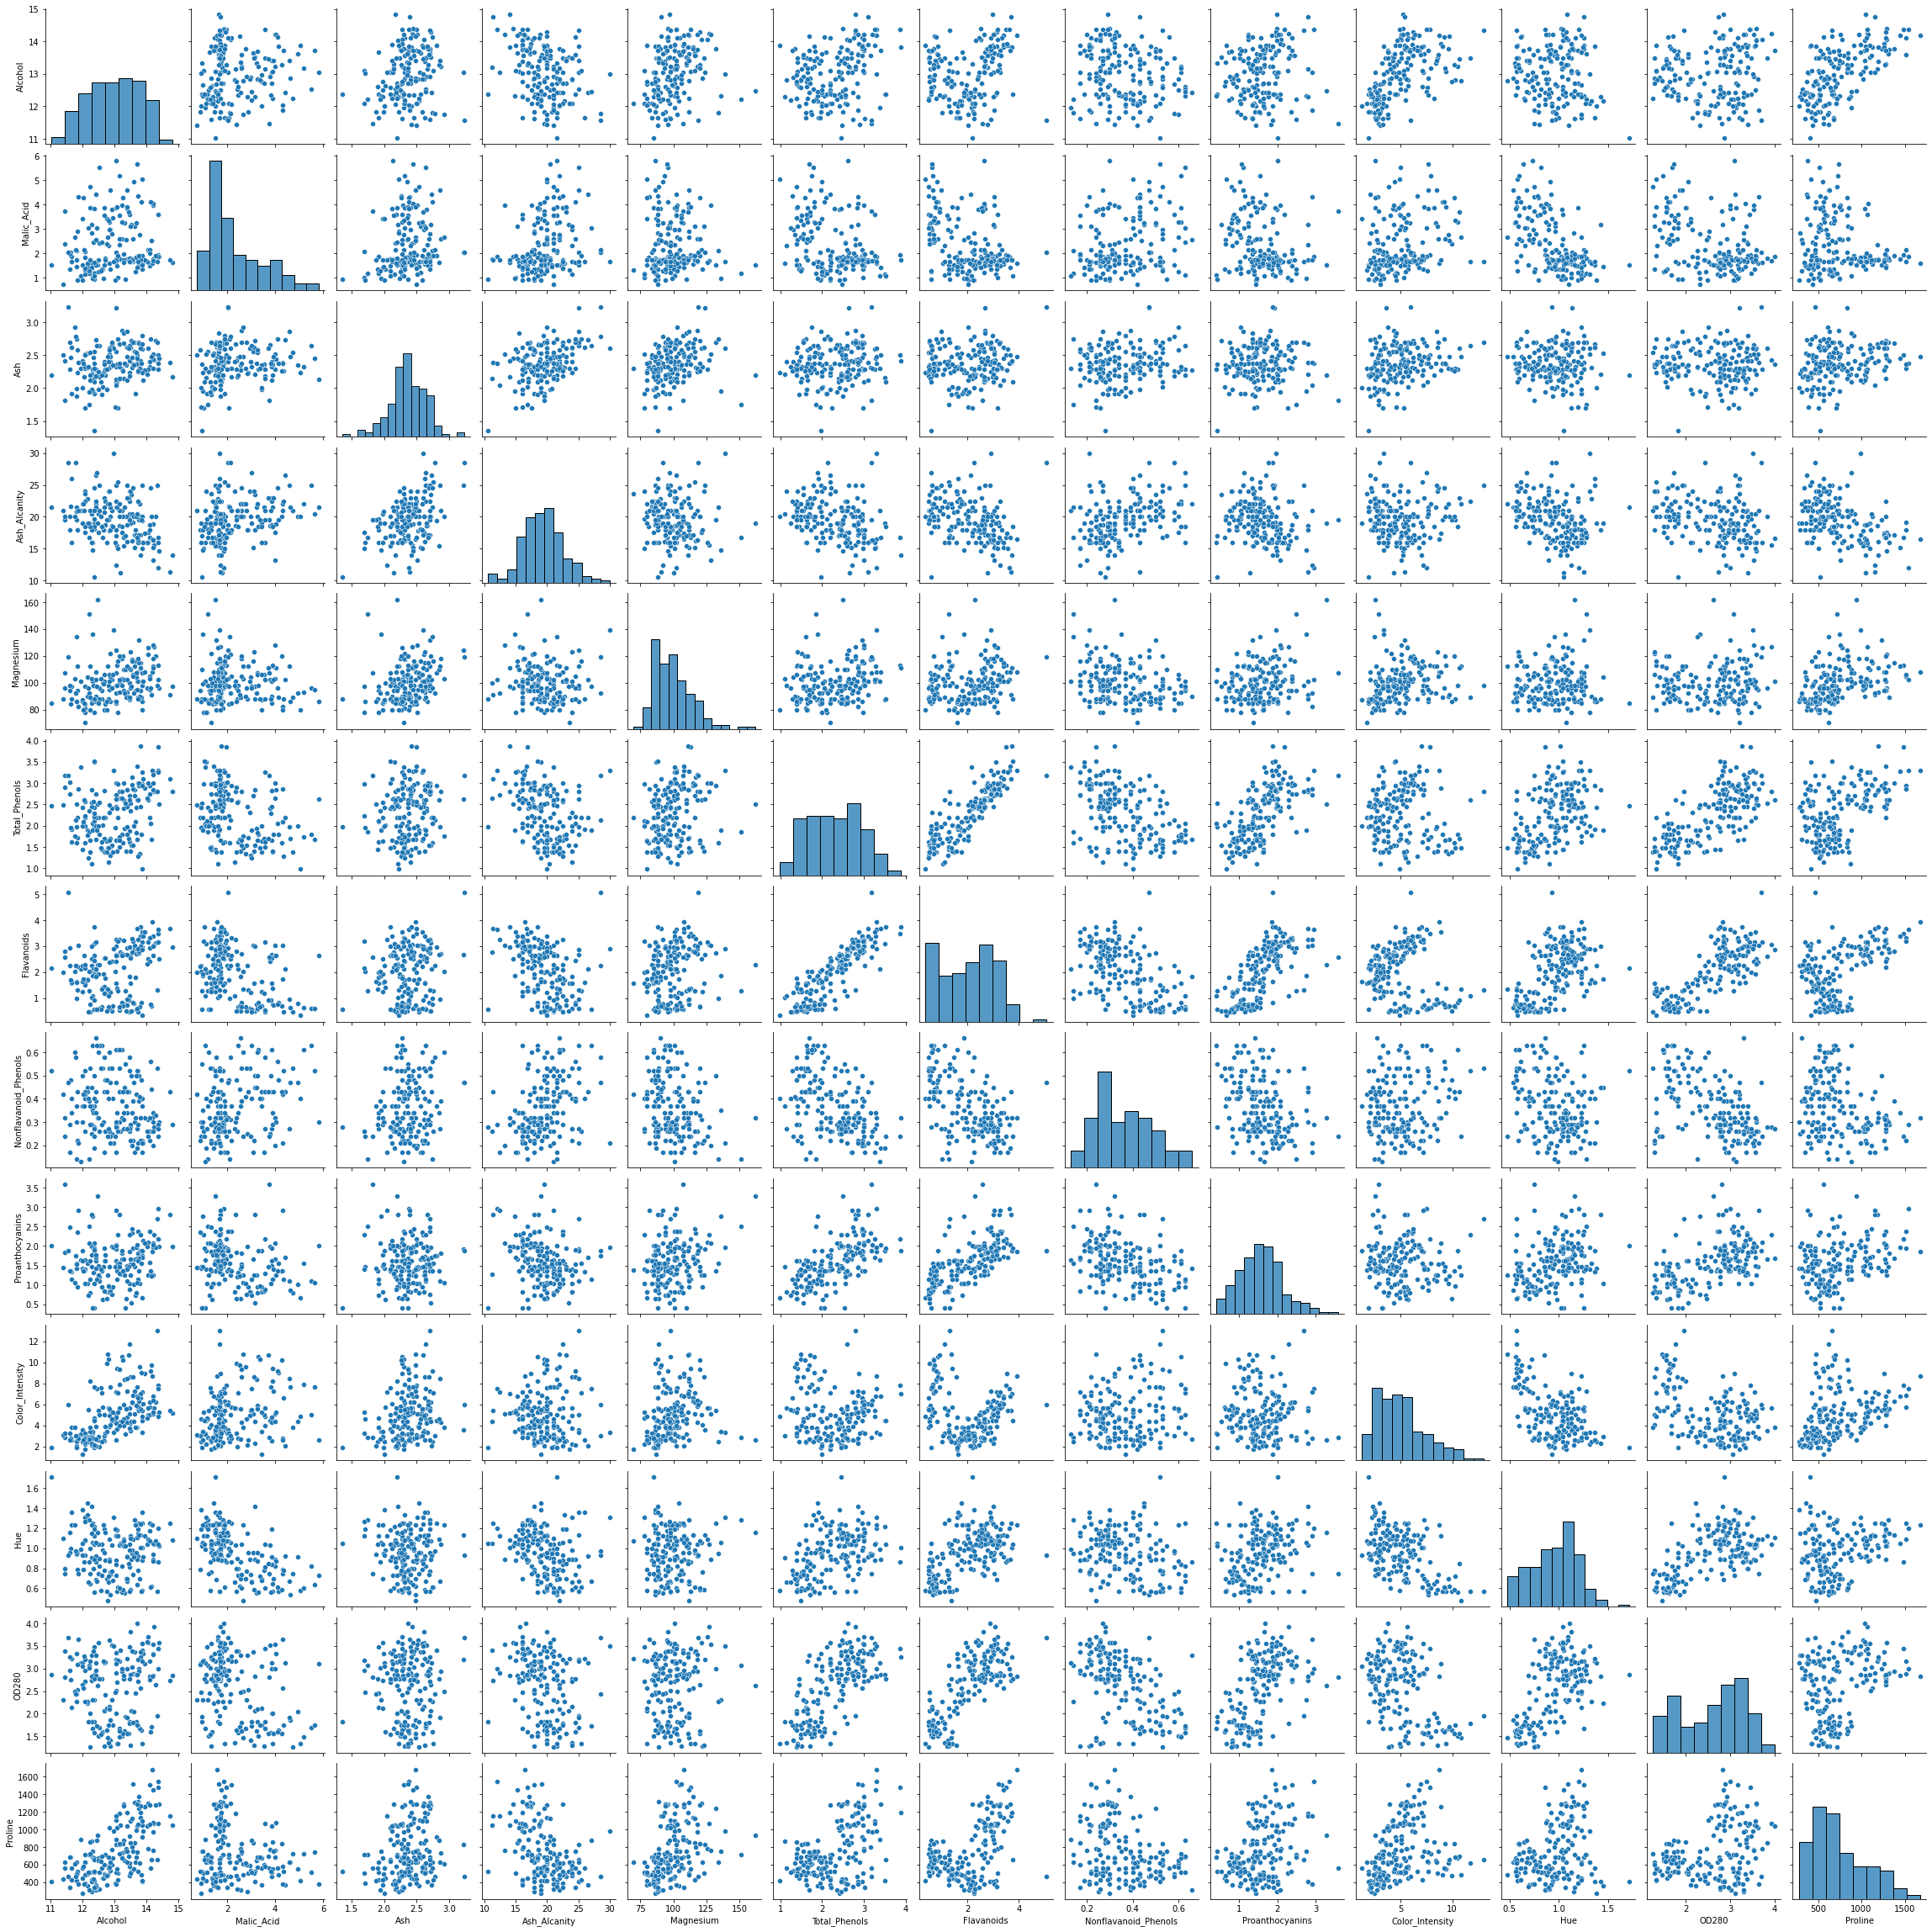

In [301]:
sns.pairplot(data=data);

# Vemos que algunas variables tienen correlaciones, por lo tanto, miremos la matriz de correlacion

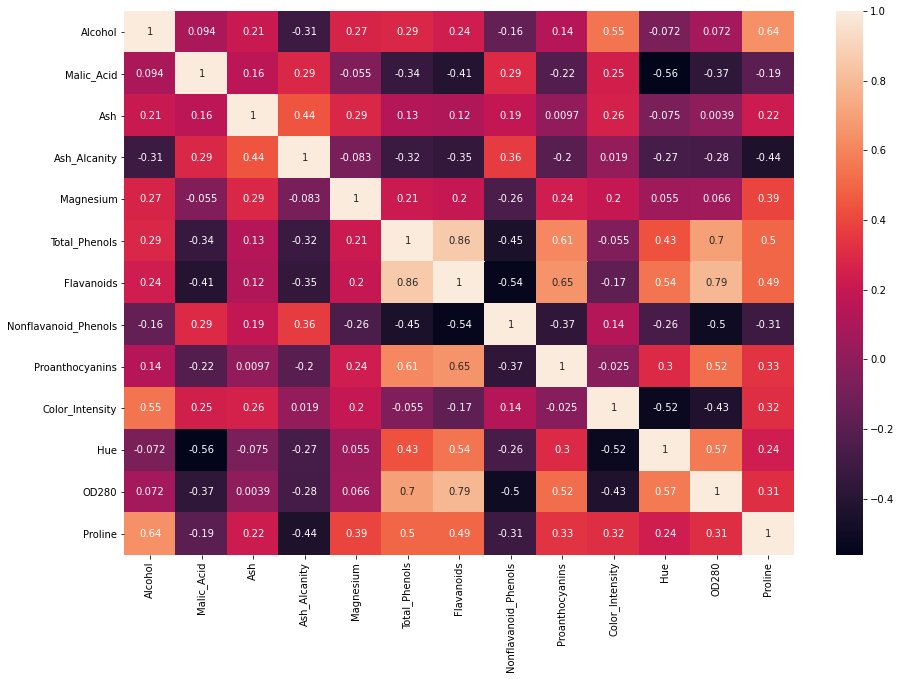

In [302]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True);

# Vemos una correlación mayor a 0.8, por lo tanto los datos presentan problemas de multicolinealidad

# Estandarización

In [303]:
sc = StandardScaler()
standard_data = sc.fit_transform(data)
standard_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Boxplot de nuevo

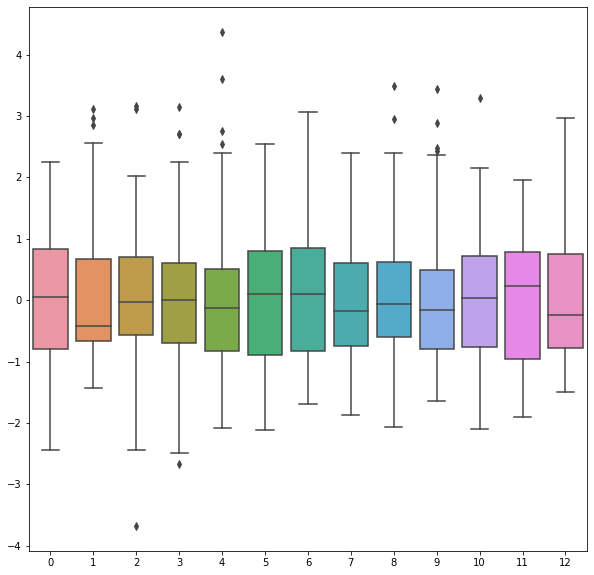

In [304]:
plt.figure(figsize=(10,10))
sns.boxplot(data = standard_data);

In [305]:
df_standard_data = pd.DataFrame(standard_data)
df_standard_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,-8.619821e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
1,178.0,-8.357859e-17,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
2,178.0,-8.657245e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
3,178.0,-1.160121e-16,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
4,178.0,-1.995907e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
5,178.0,-2.972030e-16,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
6,178.0,-4.016762e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
7,178.0,4.079134e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
8,178.0,-1.699639e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
9,178.0,-1.122697e-17,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


# Vemos que la media es casi cero y que la desviación estándar es casi 1

# Ahora, apliquemos PCA

In [306]:
pca2 = PCA(n_components=2)
pca2.fit(standard_data)
# Vectores
pca2.components_ 

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [307]:
pca2.explained_variance_ # Autovalores

array([4.73243698, 2.51108093])

In [308]:
pca2.explained_variance_ratio_ # Porcentaje de varianza explicada
f'{pca2.explained_variance_ratio_.sum()*100} %'

'55.40633835693527 %'

In [309]:
pca_projection2 = pca2.transform(standard_data)
pca_projection2
pca12 = pca_projection2[:,0]
pca22 = pca_projection2[:,1]

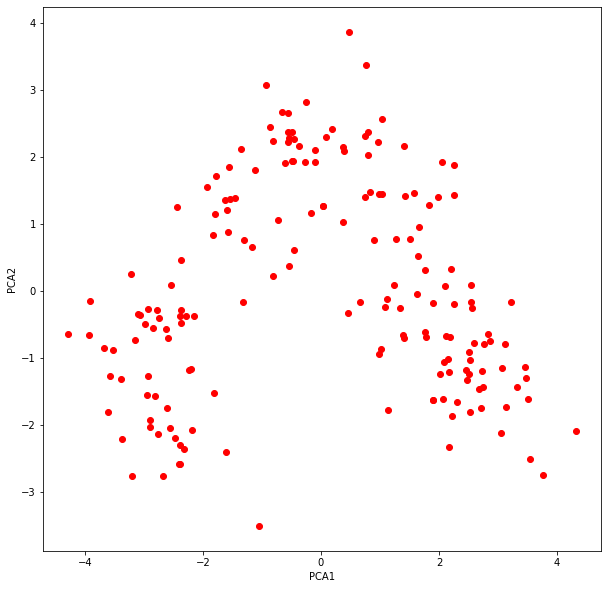

In [310]:
plt.figure(figsize=(10,10))
plt.scatter(pca12,pca22,color='r')
plt.xlabel('PCA1')
plt.ylabel('PCA2');

In [311]:
#Podemos ver que la correlación es prácticamente cero
pd.DataFrame(pca_projection2).corr()

,0,1
0,1.000000e+00,-8.500941e-16
1,-8.500941e-16,1.000000e+00


In [312]:
pca3 = PCA(n_components=3)
pca3.fit(standard_data)
# Vectores
pca3.components_ 

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [313]:
pca3.explained_variance_ # Autovalores

array([4.73243698, 2.51108093, 1.45424187])

In [314]:
pca3.explained_variance_ratio_
f'{pca3.explained_variance_ratio_.sum()*100} %'

'66.52996889318523 %'

In [315]:
# Vemos que las correlaciones son casi iguales a cero
pca_projection3 = pca3.transform(standard_data)
pca_projection3
pca13 = pca_projection3[:,0]
pca23 = pca_projection3[:,1]
pca33 = pca_projection3[:,2]
pd.DataFrame(pca_projection3).corr()

,0,1,2
0,1.000000e+00,-8.500941e-16,6.484342e-16
1,-8.500941e-16,1.000000e+00,3.072304e-16
2,6.484342e-16,3.072304e-16,1.000000e+00


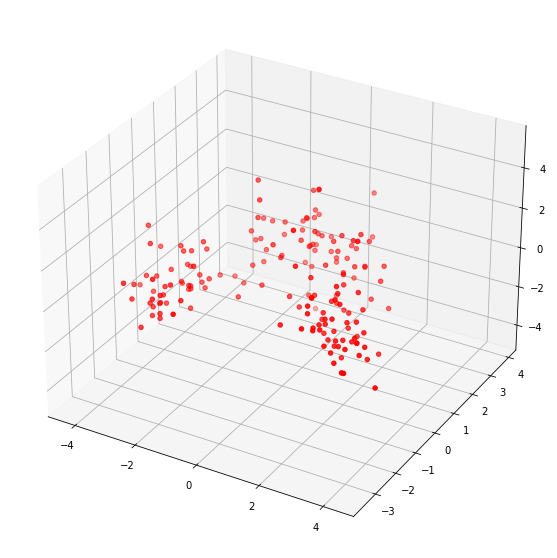

In [316]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(pca13,pca23,pca33,color='r');

# Como obtuvimos un ratio de explicabilidad de la varianza mayor con el PCA de 3 componentes, lo usaremos para hacer la clusterización.

In [317]:
def kmeans(data):
    inertia = []
    for n in range(2,11):
        np.random.seed(10)
        kmeans = KMeans(n_clusters=n).fit(data)
        inertia.append(kmeans.inertia_)
    return inertia
        
        

In [318]:
n = np.arange(2,11)
inertia = kmeans(pca_projection3)

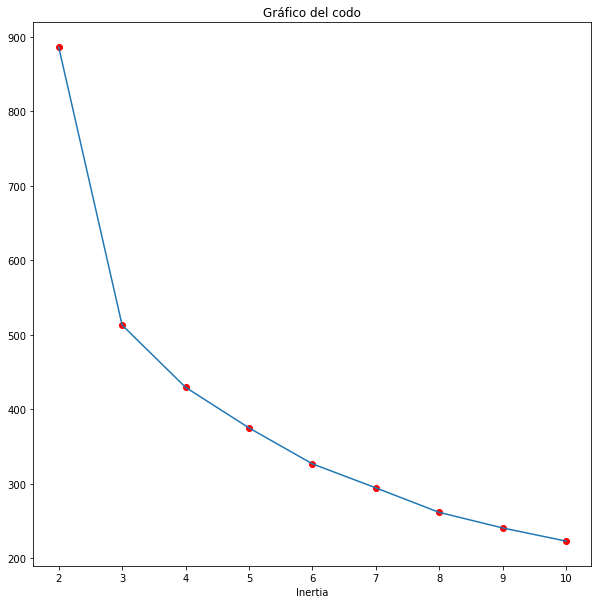

In [319]:
plt.figure(figsize=(10,10))
plt.plot(n,inertia)
plt.scatter(n,inertia,c = 'r',)
plt.xlabel('n')
plt.xlabel('Inertia')
plt.title('Gráfico del codo');

# Vemos que en n=3, la gráfica tiene el cambio más brusco. Por lo tanto, un número óptimo de clusters sería 3.

In [320]:
np.random.seed(10)
Km = KMeans(n_clusters=3,max_iter=10,tol=.02,verbose=True).fit(pca_projection3)

Initialization complete
Iteration 0, inertia 821.3083853253785
Iteration 1, inertia 518.9901866472395
Iteration 2, inertia 514.6080720000895
Converged at iteration 2: center shift 0.006228266866096085 within tolerance 0.057659306374093895.
Initialization complete
Iteration 0, inertia 826.287390128875
Iteration 1, inertia 516.4065174229557
Converged at iteration 1: center shift 0.03651263285510271 within tolerance 0.057659306374093895.
Initialization complete
Iteration 0, inertia 860.9969041191652
Iteration 1, inertia 574.0052375531778
Iteration 2, inertia 517.5516555009021
Converged at iteration 2: center shift 0.04145371854011361 within tolerance 0.057659306374093895.
Initialization complete
Iteration 0, inertia 789.25711318836
Iteration 1, inertia 525.0040413747504
Iteration 2, inertia 515.6988916801188
Converged at iteration 2: center shift 0.014485881855896991 within tolerance 0.057659306374093895.
Initialization complete
Iteration 0, inertia 797.7713139958108
Iteration 1, inertia 

In [321]:
# Las coordenadas de los centros
Km.cluster_centers_

array([[ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

In [322]:
y_predictions = Km.predict(pca_projection3)
np.unique(y_predictions,return_counts=True)

(array([0, 1, 2], dtype=int32), array([63, 51, 64]))

In [367]:
df = pd.DataFrame(pca_projection3, columns=['PCA1','PCA2','PCA3'])
df['cluster_prediction'] = y_predictions
df0 = df.where(df.cluster_prediction==0).dropna()
df1 = df.where(df.cluster_prediction==1).dropna()
df2 = df.where(df.cluster_prediction==2).dropna()
df2

,PCA1,PCA2,PCA3,cluster_prediction
59,-0.928582,3.073486,-4.585064,2.0
60,-1.542480,1.381444,-0.874683,2.0
62,0.030607,1.262786,-1.784408,2.0
63,2.050262,1.925033,-0.007369,2.0
64,-0.609681,1.908059,0.679358,2.0
...,...,...,...,...
125,-0.096810,2.109998,0.434826,2.0
126,0.038487,1.266762,0.687578,2.0
127,-1.597159,1.208144,3.361176,2.0
128,-0.479565,1.938841,1.296508,2.0


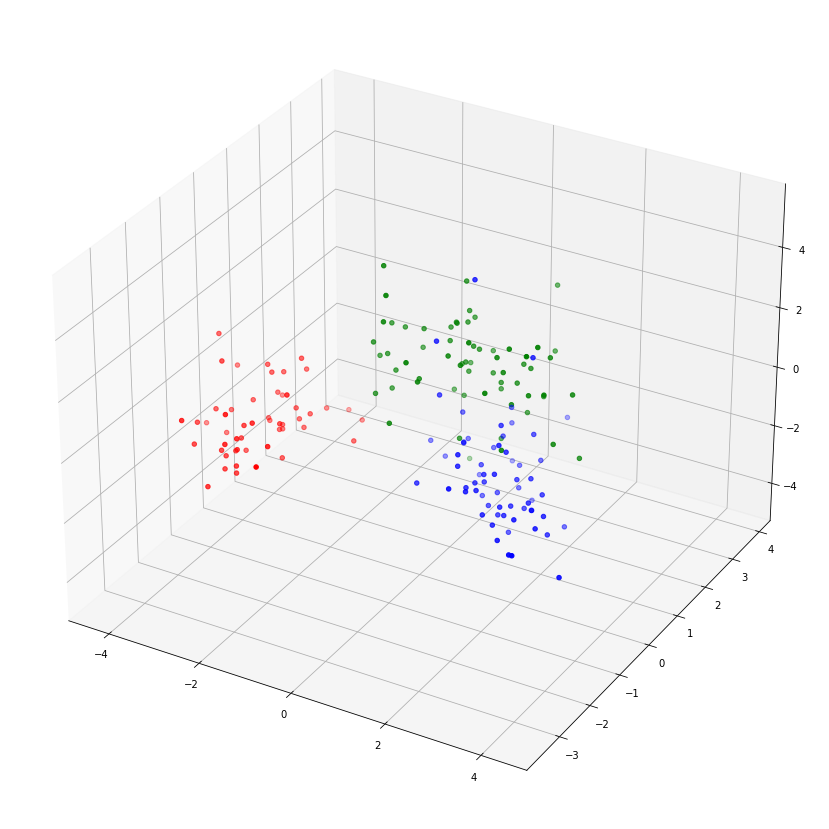

In [368]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.PCA1,df2.PCA2,df2.PCA3,c='g')
ax.scatter(df1.PCA1,df1.PCA2,df1.PCA3,c='r')
ax.scatter(df0.PCA1,df0.PCA2,df0.PCA3,c='b');

# Punto 6

In [369]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [370]:
#Agrupamiento jerárquico
hierar_clus = AgglomerativeClustering()
predictions2 = hierar_clus.fit_predict(pca_projection3)
predictions2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [371]:
df['cluster_prediction'] = pd.DataFrame(predictions2)
df

,PCA1,PCA2,PCA3,cluster_prediction
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [372]:
df02 = df.where(df.cluster_prediction==0).dropna()
df12 = df.where(df.cluster_prediction==1).dropna()
df02

,PCA1,PCA2,PCA3,cluster_prediction
0,3.316751,-1.443463,-0.165739,0.0
1,2.209465,0.333393,-2.026457,0.0
2,2.516740,-1.031151,0.982819,0.0
3,3.757066,-2.756372,-0.176192,0.0
4,1.008908,-0.869831,2.026688,0.0
...,...,...,...,...
127,-1.597159,1.208144,3.361176,0.0
128,-0.479565,1.938841,1.296508,0.0
129,-1.792833,1.150288,0.782800,0.0
130,-1.327102,-0.170389,-1.180013,0.0


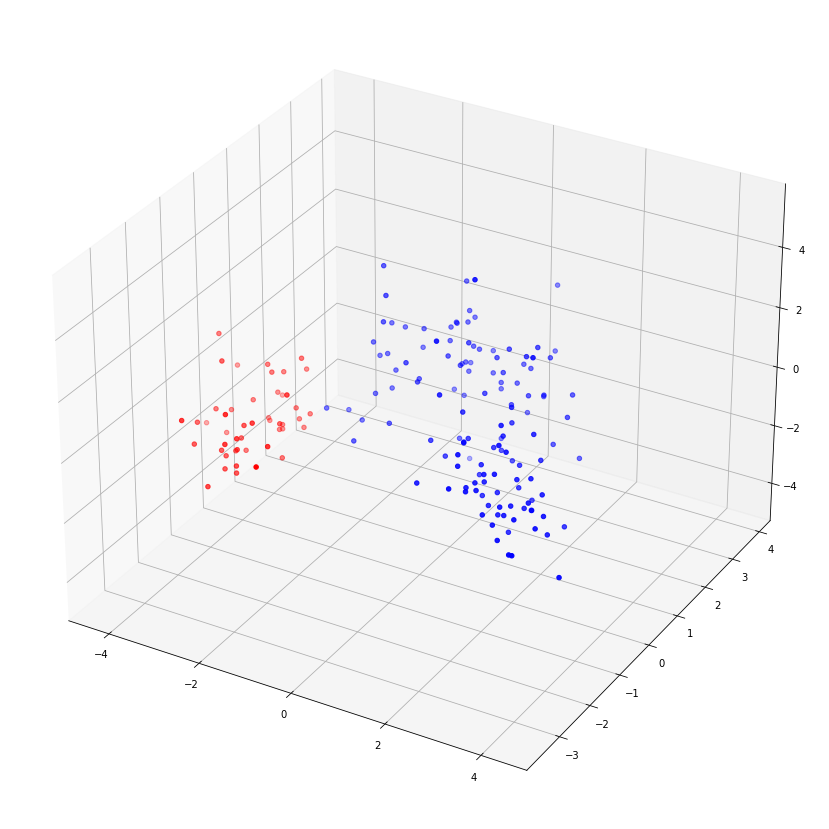

In [373]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df12.PCA1,df12.PCA2,df12.PCA3,c='r')
ax.scatter(df02.PCA1,df02.PCA2,df02.PCA3,c='b');

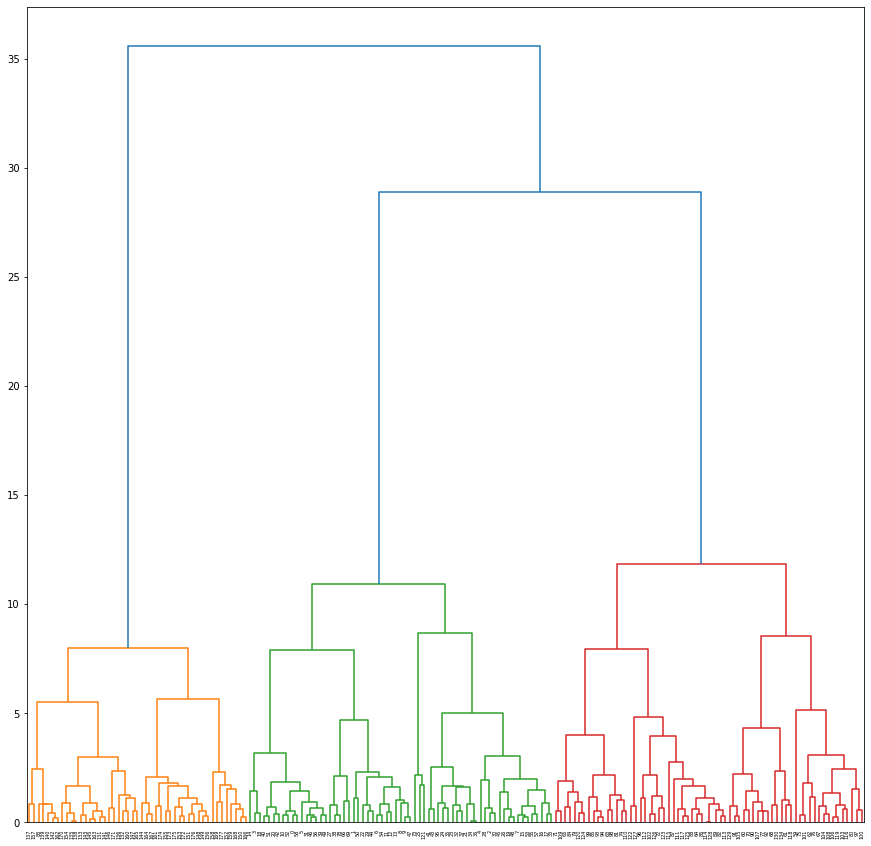

In [374]:
# Dendograma
plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))

# Según el dendograma, podemos ver que el número óptimo de cluster es 4. Por lo tanto, miremos el agrupamiento con 4

In [375]:
np.random.seed(10)
Km4 = KMeans(n_clusters=4,max_iter=10,tol=.02,verbose=True).fit(pca_projection3)

Initialization complete
Iteration 0, inertia 609.2631632054148
Iteration 1, inertia 463.14723034975776
Iteration 2, inertia 452.91980652119946
Iteration 3, inertia 446.7473981120435
Iteration 4, inertia 441.9819802135416
Iteration 5, inertia 436.73989729052556
Converged at iteration 5: center shift 0.03759975440955345 within tolerance 0.057659306374093895.
Initialization complete
Iteration 0, inertia 518.8225534868709
Iteration 1, inertia 432.84032477715976
Converged at iteration 1: center shift 0.016453120153008705 within tolerance 0.057659306374093895.
Initialization complete
Iteration 0, inertia 632.4128549931837
Iteration 1, inertia 467.2418570961609
Iteration 2, inertia 457.6164348672587
Converged at iteration 2: center shift 0.021255526165451274 within tolerance 0.057659306374093895.
Initialization complete
Iteration 0, inertia 609.4124180694785
Iteration 1, inertia 473.4707530228516
Converged at iteration 1: center shift 0.04794349674744388 within tolerance 0.057659306374093895.

In [376]:
y_predictions4 = Km4.predict(pca_projection3)
y_predictions4

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [377]:
df4 = pd.DataFrame(pca_projection3, columns=['PCA1','PCA2','PCA3'])
df4['cluster_prediction'] = y_predictions4
df04 = df4.where(df4.cluster_prediction==0).dropna()
df14 = df4.where(df4.cluster_prediction==1).dropna()
df24 = df4.where(df4.cluster_prediction==2).dropna()
df34 = df4.where(df4.cluster_prediction==3).dropna()


In [379]:
df34.head()

,PCA1,PCA2,PCA3,cluster_prediction
0,3.316751,-1.443463,-0.165739,3.0
1,2.209465,0.333393,-2.026457,3.0
2,2.516740,-1.031151,0.982819,3.0
3,3.757066,-2.756372,-0.176192,3.0
4,1.008908,-0.869831,2.026688,3.0


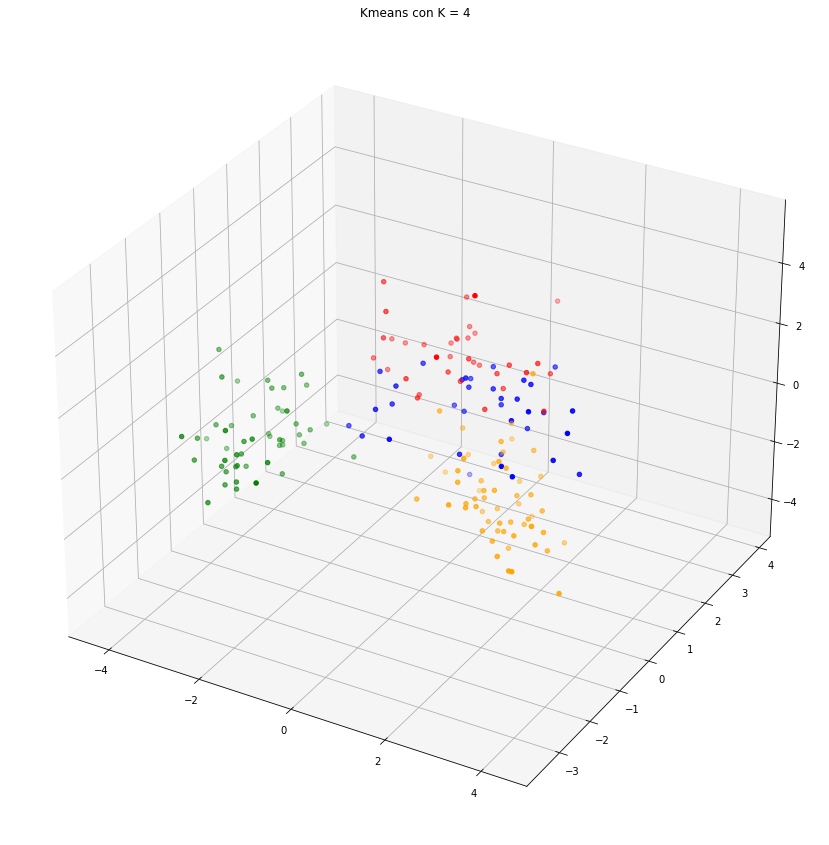

In [382]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df34.PCA1,df34.PCA2,df34.PCA3,c='orange')
ax.scatter(df24.PCA1,df24.PCA2,df24.PCA3,c='g')
ax.scatter(df14.PCA1,df14.PCA2,df14.PCA3,c='r')
ax.scatter(df04.PCA1,df04.PCA2,df04.PCA3,c='b')
plt.title('Kmeans con K = 4');